


##Deep Learning Sentiment Analysis from IMDB dataset

---






In [ ]:
#Importing Packages
from keras.datasets import imdb


Loading the dataset

In [ ]:
vocabulary_size = 10000
(xtrain,ytrain),(xtest,ytest)= imdb.load_data(num_words=vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xtrain), len(xtest)))

Loaded dataset with 25000 training samples, 25000 test samples


In [ ]:
max_words = max(len(max((xtrain), key=len)),len(max((xtest), key=len)))
max_words

2494

In [ ]:
min_words = min(len(min((xtrain), key=len)),len(min((xtest), key=len)))
min_words

7

Pad Sequences. Making all the reviews of same number of words.

In [ ]:
from keras.preprocessing import sequence
maxlen= max_words
xtrain = sequence.pad_sequences(xtrain, maxlen=maxlen)
xtest = sequence.pad_sequences(xtest, maxlen=maxlen)

Using Bidirectional LSTM




In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=maxlen))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2494, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 2494, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________
None


Train and Evaluate

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=200
num_epochs=5
xvalid , yvalid = xtrain[:batch_size], ytrain[:batch_size]
xtrain2 , ytrain2 = xtrain[batch_size:], ytrain[batch_size:]


In [ ]:
history=model.fit(xtrain2,ytrain2,epochs=num_epochs,batch_size=batch_size,validation_data=(xvalid,yvalid))

Epoch 1/5
124/124 [==============================] - 1107s 9s/step - loss: 0.5062 - accuracy: 0.7360 - val_loss: 0.2899 - val_accuracy: 0.8900
Epoch 2/5
124/124 [==============================] - 1063s 9s/step - loss: 0.2535 - accuracy: 0.9025 - val_loss: 0.2229 - val_accuracy: 0.9100
Epoch 3/5
124/124 [==============================] - 1066s 9s/step - loss: 0.1764 - accuracy: 0.9388 - val_loss: 0.2126 - val_accuracy: 0.9050
Epoch 4/5
124/124 [==============================] - 1076s 9s/step - loss: 0.1282 - accuracy: 0.9575 - val_loss: 0.2347 - val_accuracy: 0.9150
Epoch 5/5
124/124 [==============================] - 1068s 9s/step - loss: 0.0977 - accuracy: 0.9704 - val_loss: 0.2662 - val_accuracy: 0.9150


In [ ]:
results = model.evaluate(xtest,ytest)
print(results)

782/782 [==============================] - 486s 619ms/step - loss: 0.3893 - accuracy: 0.8676
[0.3892516791820526, 0.8676000237464905]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

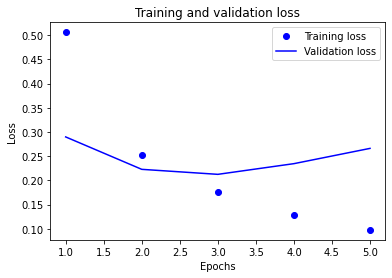

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

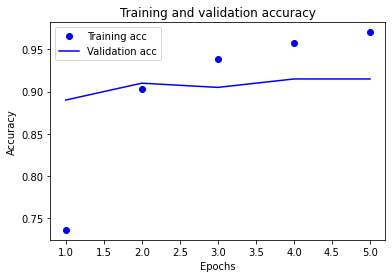

In [ ]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()